# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
#### Answer
A way to search for matching text patterns - If there is one it returns an object and no if not

> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [14]:
import re
import requests

# Fetch content from the link
response = requests.get('https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt')
text = response.text

# The regular expression to match 4-digit numbers
pattern = r'\b\d{4}\b'

# Use findall to extract all 4-digit numbers from the text
matched_numbers = re.findall(pattern, text)

print(matched_numbers)


['1234', '9999']


In [15]:
import re

# The regular expression to match words starting with "super"
pattern2 = r'\bsuper\w*\b'

# Use findall to extract all matching words from the text
matched_words = re.findall(pattern2, text, re.IGNORECASE)  # re.IGNORECASE ensures it captures words like "Superman" as well

print(matched_words)


['superpolaroid', 'supertaxidermy', 'superbeer']


In [16]:
#Extract wiki-links
import re

# The regular expression to match wiki-links
pattern3 = r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]'
matched_links = re.findall(pattern3, text)

print(matched_links)


['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle', 'Pitchfork']


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [17]:
import urllib.request

url = 'https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians'
response = urllib.request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')


text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Category:West Coast hip hop musicians - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limi

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [18]:
import pandas as pd 
import re

EastCoast=pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/EastCoastRappers.csv')
WestCoast=pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/WestCoastRappers.csv')
TopRapper = EastCoast.WikipediaPageName[0]
TopRapper = EastCoast.WikipediaPageName[0]
TopRapper




'6ix9ine'

In [19]:
# remove parentheses content from a string
def remove_parentheses_content(s):
    return re.sub(r'\(.*?\)', '', s).strip()

# Get links from wikipedia
def get_links_from_wikipedia(rapper_name):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": rapper_name
    }
    wikitext_request = requests.get(baseurl, params=params)
    wikijson = wikitext_request.json()

    page_id = list(wikijson["query"]["pages"].keys())[0]
    wikitext = wikijson["query"]["pages"][page_id]["revisions"][0]["*"]

    pattern = r'\[\[(?:Category:)?([^\|\]]+)(?:\|[^\]]+)?\]\]'
    matched_links = re.findall(pattern, wikitext)
    
    return matched_links

# Read in the data
EastCoast = pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/EastCoastRappers.csv')
WestCoast = pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/WestCoastRappers.csv')

# Get links for each rapper
eastcoast_links = {rapper: get_links_from_wikipedia(rapper) for rapper in EastCoast.WikipediaPageName}
westcoast_links = {rapper: get_links_from_wikipedia(rapper) for rapper in WestCoast.WikipediaPageName}

# Remove parentheses content from links
eastcoast_links = {rapper: [remove_parentheses_content(link) for link in links] for rapper, links in eastcoast_links.items()}
westcoast_links = {rapper: [remove_parentheses_content(link) for link in links] for rapper, links in westcoast_links.items()}


print(eastcoast_links)
print(westcoast_links)


{'6ix9ine': ['New York City', 'Hip hop music', 'hardcore hip hop', 'punk rap', 'scream rap', 'SoundCloud rap', 'reggaeton', 'Trap music', 'Apple Music', 'Create Music Group', '10K Projects', 'Virgin Music Label & Artist Services', 'Shotti', 'feud', 'Poles 1469', 'Gummo', 'sleeper hit', 'mixtape', 'Day69', 'Kooda', 'Keke', 'Fetty Wap', 'A Boogie wit da Hoodie', 'Gotti', 'Billboard Hot 100', 'Fefe', 'Nicki Minaj', 'Murda Beatz', 'Dummy Boy', 'Billboard 200', 'RIAA certification', 'Recording Industry Association of America', 'pleaded guilty', 'felony', 'Child pornography', 'probation', 'Trial of the Nine Trey Gangsters', 'Racket', 'Conspiracy', 'Murder', 'armed robbery', 'COVID-19 pandemic', 'COVID-19', 'asthma', 'Gooba', 'Trollz', 'TattleTales', 'Billboard 200', 'Trial of the Nine Trey Gangsters', 'Bushwick, Brooklyn', 'Atlixco', 'Puebla', 'Río Piedras, Puerto Rico', 'San Juan, Puerto Rico', 'Tidal', 'Psalm 121', 'Child School and Legacy High School', 'Emotional trauma', 'post-traumatic 

In [20]:
#For each link check if it matches from the csv file. That must mean it indeed is a rapper, if not remove it from the list
all_rappers=list(EastCoast.WikipediaPageName)+list(WestCoast.WikipediaPageName)

def filter_links_based_on_csv(rapper_links):
    return [link for link in rapper_links if link in all_rappers]

filtered_eastcoast_links = {rapper: filter_links_based_on_csv(links) for rapper, links in eastcoast_links.items()}
filtered_westcoast_links = {rapper: filter_links_based_on_csv(links) for rapper, links in westcoast_links.items()}

filtered_eastcoast_links 

{'6ix9ine': ['Fetty Wap',
  'ZillaKami',
  'Fetty Wap',
  'Meek Mill',
  'DMX',
  'Tupac Shakur',
  'The Notorious B.I.G.',
  '50 Cent',
  'ZillaKami',
  'Meek Mill',
  '50 Cent',
  'Lil Tjay',
  '6ix9ine'],
 '9th Prince': ['RZA', 'RZA', 'Islord', 'Hell Razah'],
 '22Gz': ['Pop Smoke', 'Sheff G', 'Pop Smoke', 'Fivio Foreign'],
 '38 Spesh': ['Styles P',
  'Jadakiss',
  'Fred the Godson',
  'N.O.R.E.',
  'Kool G Rap',
  'DJ Premier',
  'Pete Rock',
  'Conway the Machine',
  'Benny the Butcher',
  'Kool G Rap'],
 'The 45 King': ['Queen Latifah', 'Jay-Z'],
 '50 Cent': ['Dr. Dre',
  'Nate Dogg',
  'Lloyd Banks',
  'Tony Yayo',
  'Jam Master Jay',
  'Jay-Z',
  'Kurupt',
  'Big Pun',
  'DMX',
  'Nas',
  'Sha Money XL',
  'Jay-Z',
  'Dr. Dre',
  'Sha Money XL',
  'Lloyd Banks',
  'Lloyd Banks',
  'Tony Yayo',
  'Spider Loc',
  '40 Glocc',
  'Mase',
  'Jay-Z',
  'Cardiak',
  'Lloyd Banks',
  'Dr. Dre',
  'Swizz Beatz',
  'Pop Smoke',
  'Big Daddy Kane',
  'KRS-One',
  'Nas',
  'Rakim',
  'The No

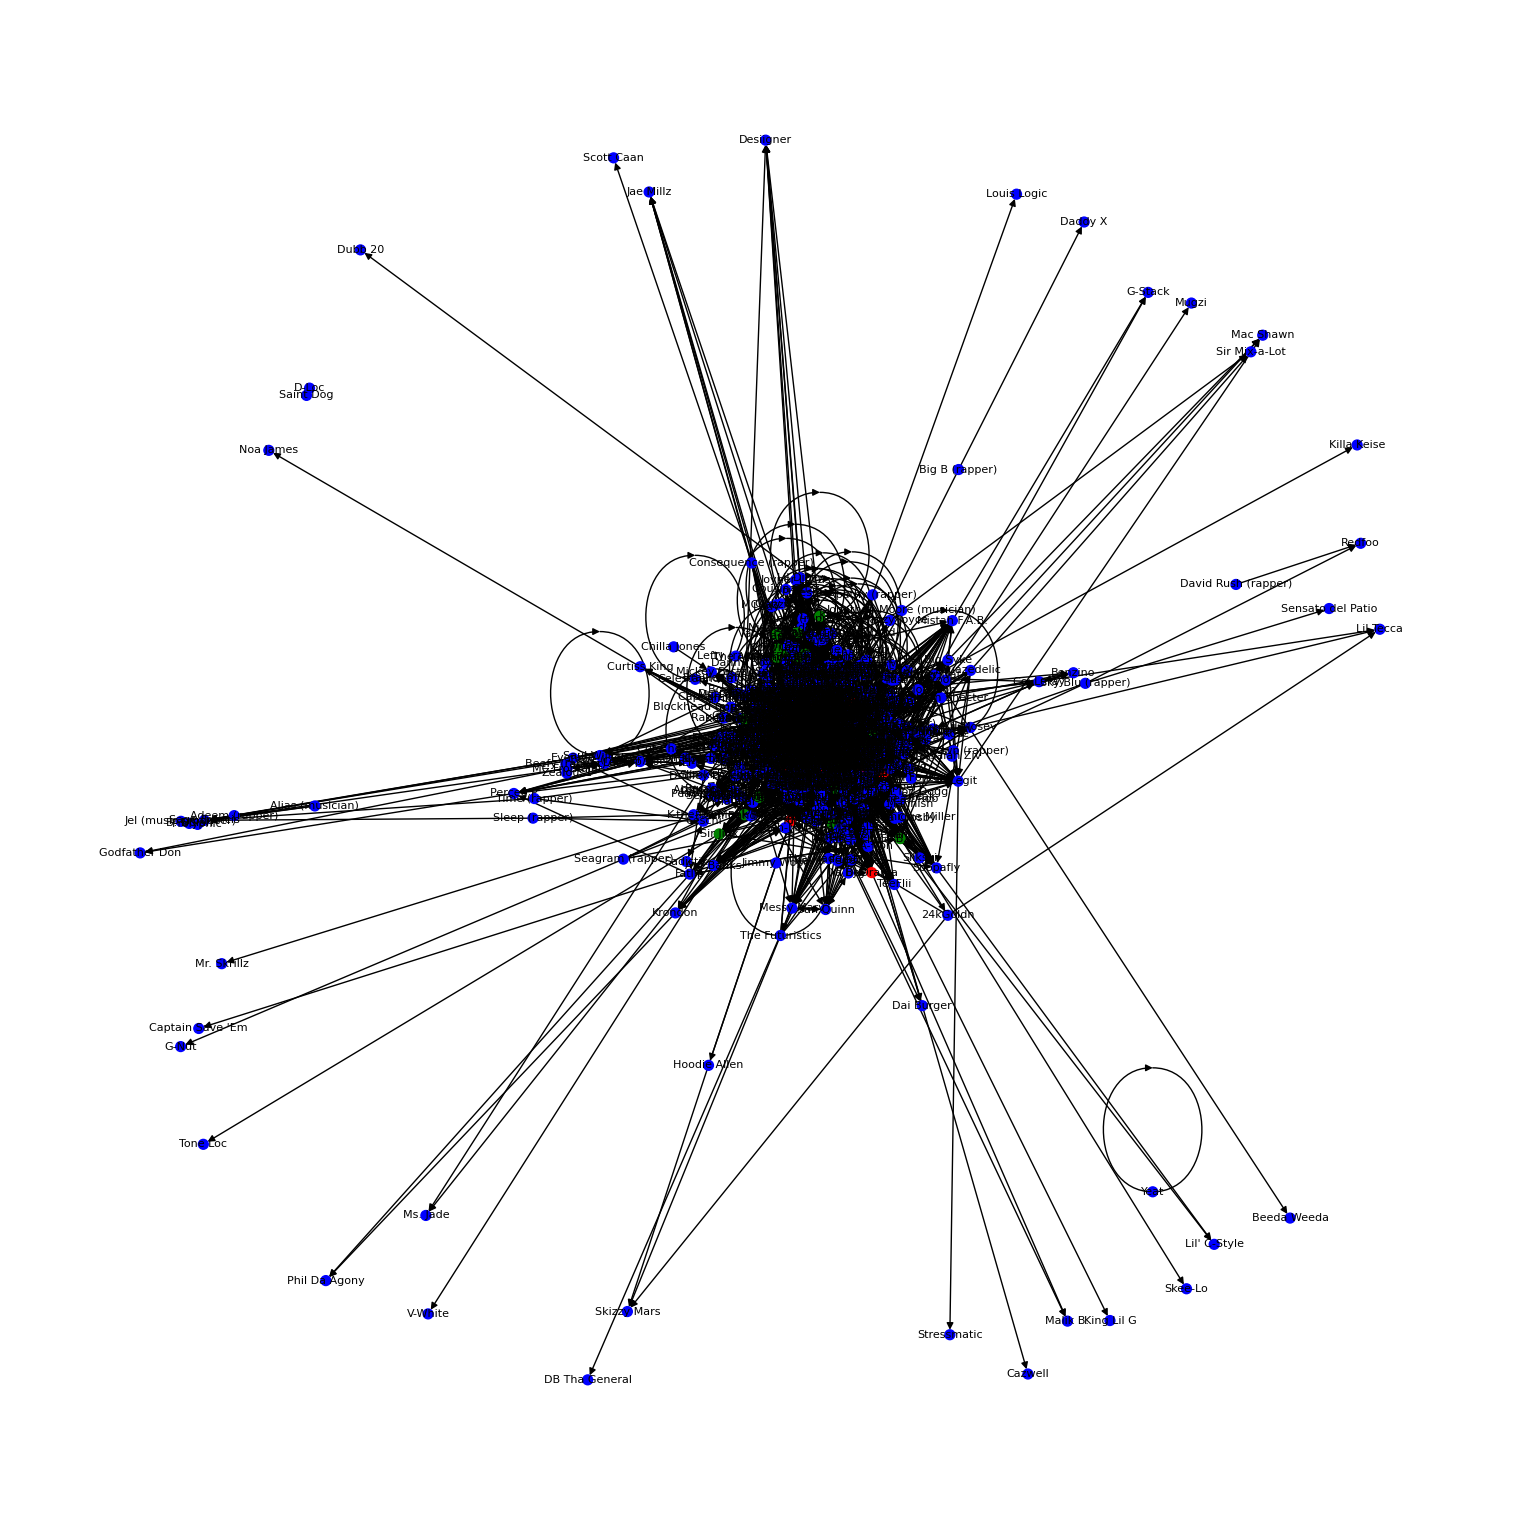

In [21]:
#Store rappers as nodes in networkX graph 
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(all_rappers)

#Add directed edges between rappers that are linked to each other
for rapper, links in filtered_eastcoast_links.items():
    for link in links:
        G.add_edge(rapper, link)

for rapper, links in filtered_westcoast_links.items():
    for link in links:
        G.add_edge(rapper, link)

#Delete nodes with no edges
G.remove_nodes_from(list(nx.isolates(G)))# Store rappers as nodes in networkX directed graph
import networkx as nx

G = nx.DiGraph()  # Use DiGraph for directed graph
G.add_nodes_from(all_rappers)

# Add directed edges between rappers that are linked to each other
for rapper, links in filtered_eastcoast_links.items():
    for link in links:
        G.add_edge(rapper, link)

for rapper, links in filtered_westcoast_links.items():
    for link in links:
        G.add_edge(rapper, link)

# Delete nodes with no edges
G.remove_nodes_from(list(nx.isolates(G)))

# Print the top nodes with the highest in-degree and out-degree
top_in_degree = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:50]
top_out_degree = sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:50]

# Color the top nodes based on in-degree and out-degree
for node, degree in top_in_degree:
    G.nodes[node]['color'] = 'red'
for node, degree in top_out_degree:
    G.nodes[node]['color'] = 'green'  # This will overwrite the color for nodes that are in both top lists

# Plot the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
node_colors = [G.nodes[node].get('color', 'blue') for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=node_colors, arrows=True)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center')

plt.show()




> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * What is the number of links connecting West coast and East coast? What do those links mean?
> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [22]:
#Print the number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

#Print the average degree of the graph
print("Average degree:", sum(dict(G.degree()).values())/G.number_of_nodes())

#Print number of links connecting west coast and east coast rappers
print("links connecting west and east rappers:", sum([1 for edge in G.edges() if edge[0] in list(EastCoast.WikipediaPageName) and edge[1] in list(WestCoast.WikipediaPageName)]))

Number of nodes: 724
Number of edges: 5259
Average degree: 14.527624309392266
links connecting west and east rappers: 531


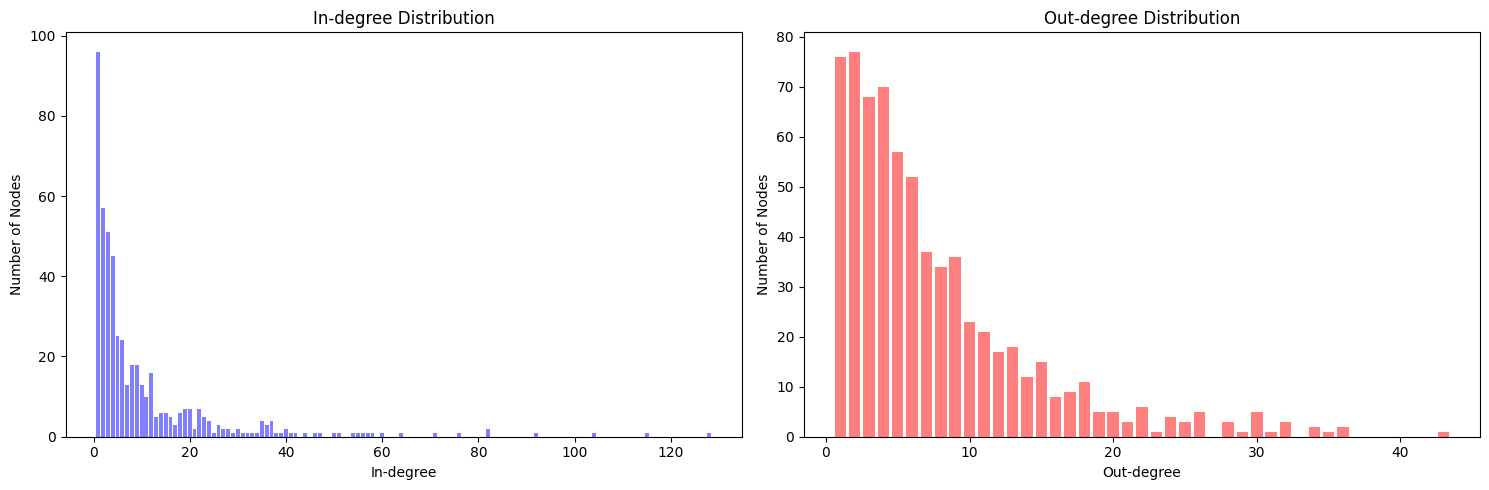

In [23]:
# Indegree values
in_degree_values = [val for key, val in G.in_degree()]
out_degree_values = [val for key, val in G.out_degree()]

# Extract in-and out-degree
top_in_degree = [val for key, val in G.in_degree()]
top_out_degree = [val for key, val in G.out_degree()]

# Initialize a new figure for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot in-degree histogram on the left subplot (ax1)
ax1.hist(in_degree_values, bins=range(1, max(in_degree_values)+2), align='left', rwidth=0.8, alpha=0.5, color='blue')
ax1.set_title('In-degree Distribution')
ax1.set_xlabel('In-degree')
ax1.set_ylabel('Number of Nodes')

# Plot out-degree histogram on the right subplot (ax2)
ax2.hist(out_degree_values, bins=range(1, max(out_degree_values)+2), align='left', rwidth=0.8, alpha=0.5, color='red')
ax2.set_title('Out-degree Distribution')
ax2.set_xlabel('Out-degree')
ax2.set_ylabel('Number of Nodes')

# Display the plots
plt.tight_layout()

# Display the plot
plt.show()




In [24]:
#Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
top_in_degree = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:10]
print('top in degree', top_in_degree)

top_out_degree = sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:10]
print('top out degree', top_out_degree)

#Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
top_5_west = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:5]
print('top 5 west', top_5_west)

#Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?
top_5_east = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:5]
print('top 5 east', top_5_east)




top in degree [('Snoop Dogg', 128), ('Jay-Z', 115), ('Nas', 104), ('50 Cent', 92), ('Busta Rhymes', 82), ('Dr. Dre', 82), ('Kendrick Lamar', 76), ('Tupac Shakur', 71), ('The Notorious B.I.G.', 64), ('E-40', 60)]
top out degree [('Drag-On', 43), ('DJ Dahi', 36), ('Dr. Dre', 36), ('Kendrick Lamar', 35), ('Black Thought', 34), ('The Game (rapper)', 34), ('Jahlil Beats', 32), ('French Montana', 32), ('Kurupt', 32), ('50 Cent', 31)]
top 5 west [('Snoop Dogg', 128), ('Jay-Z', 115), ('Nas', 104), ('50 Cent', 92), ('Busta Rhymes', 82)]
top 5 east [('Snoop Dogg', 128), ('Jay-Z', 115), ('Nas', 104), ('50 Cent', 92), ('Busta Rhymes', 82)]


> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)
